In [151]:
import ssl
import urllib.request
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

ssl._create_default_https_context = ssl._create_unverified_context

In [152]:

url = "https://en.wikipedia.org/wiki/List_of_best-selling_game_consoles"

page = urllib.request.urlopen(url)

soup = BeautifulSoup(page, "lxml")

#print(soup.prettify())

sortable_table = soup.find_all('table', class_="wikitable sortable")

right = sortable_table[0]


In [153]:
A=[]
B=[]
C=[]
D=[]
E=[]


for row in right.find_all('tr'):
    cells=row.find_all('td')
    if len(cells)==6:
        A.append(cells[0].find(text=True).strip())  
        B.append(cells[1].find(text=True).strip())
        C.append(cells[2].find(text=True).strip())
        D.append(cells[3].find(text=True).strip())
        E.append(cells[4].find(text=True).strip())

In [154]:
import pandas as pd
df=pd.DataFrame(A, columns = ['Platform'])
df['Type'] = B
df['Firm'] = C
df['Released'] = D
df['Units sold'] = E
# Display the DataFrame
df

,Platform,Type,Firm,Released,Units sold
0,PlayStation 2,Home,Sony,2000,>
1,Nintendo DS,Handheld,Nintendo,2004,154.02 million
2,Nintendo Switch,Hybrid,Nintendo,2017,122.55 million
3,Game Boy,Handheld,Nintendo,1989,118.69 million
4,PlayStation 4,Home,Sony,2013,117.2 million
5,PlayStation,Home,Sony,1994,102.49 million
6,Wii,Home,Nintendo,2006,101.63 million
7,PlayStation 3,Home,Sony,2006,>
8,Xbox 360,Home,Microsoft,2005,>
9,Game Boy Advance,Handheld,Nintendo,2001,81.51 million


In [155]:
df.to_csv("CSC221-webscrape-data.csv")

In [177]:
DF_platform = pd.read_csv("CSC221-webscrape-data.csv")
DF_platform.head(10)
DF_platform['Units sold'] = DF_platform['Units sold'].str.replace('\xa0million', '')
DF_platform['Units sold'] = pd.to_numeric(DF_platform['Units sold'], errors='coerce')

DF_platform['Units sold'] = DF_platform['Units sold'].astype(float)

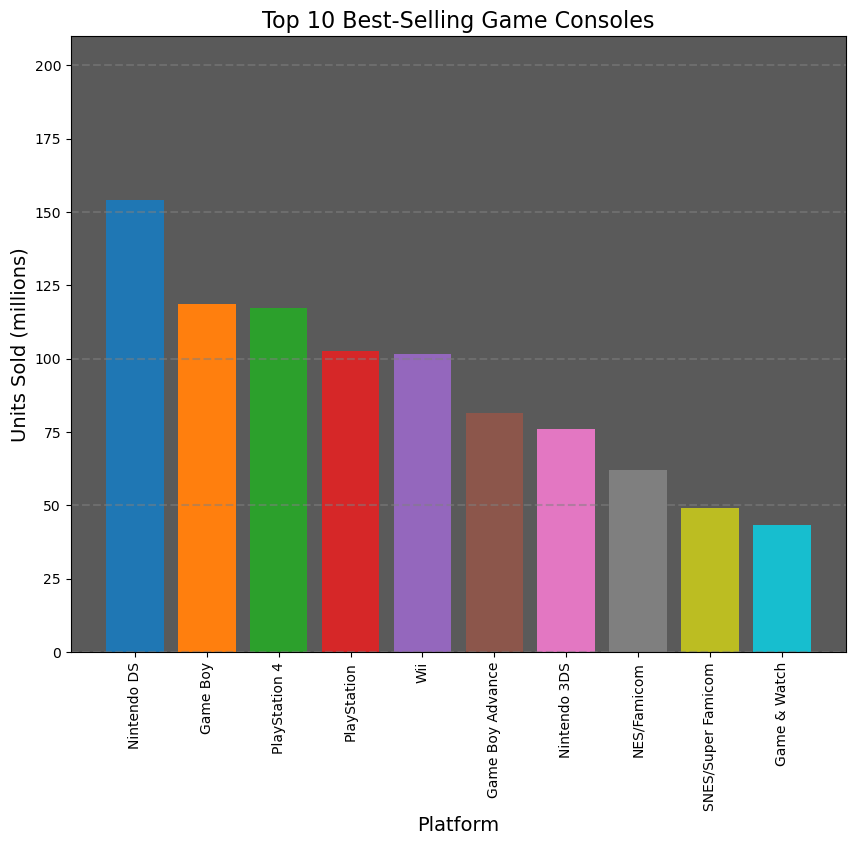

In [179]:
top_10 = DF_platform.sort_values(by='Units sold', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10,8))

# Create the bar chart
ax.bar(top_10['Platform'], top_10['Units sold'], color=colorblind_friendly_colors)

# Set the axis labels and title
ax.set_title('Top 10 Best-Selling Game Consoles', fontsize=16)
ax.set_xlabel('Platform', fontsize=14)
ax.set_ylabel('Units Sold (millions)', fontsize=14)

# Set the background color
ax.set_facecolor('#5A5A5A')

for y in range(0, int(max(top_10['Units sold']))+50, 50):
    ax.axhline(y=y, color='gray', linestyle='--', alpha=0.5)

plt.xticks(range(len(top_10)), top_10['Platform'], rotation=90)

plt.show()